In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('C:/Users/DELL NOTEBOOK/Downloads/pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# CLEANING DATASET

In [3]:
df = df.set_index('Name')

In [4]:
for i in df.index:
    b=i.find("Mega ")
    if b!=-1:
        df.index=df.index.str.replace(i,i[b:])
df.head(10)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


In [5]:
df=df.drop(['#'],axis=1)
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [6]:
df['Type 2'].fillna(df['Type 1'], inplace=True)

C:\Users\DELL NOTEBOOK\AppData\Local\Temp\ipykernel_9408\65929342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna(df['Type 1'], inplace=True)


# Basic Analysis

In [7]:
print(df.shape)

(800, 11)


In [8]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
print('The unique  pokemon types are', df['Type 1'].unique())

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [10]:
print(df.groupby(['Type 1']).size())

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64


In [11]:
import random
r=random.randint(0,800)
print(df.index[r],"\n")
print(df.iloc[r])

Darumaka 

Type 1         Fire
Type 2         Fire
Total           315
HP               70
Attack           90
Defense          45
Sp. Atk          15
Sp. Def          45
Speed            50
Generation        5
Legendary     False
Name: Darumaka, dtype: object


In [12]:
df[df['Legendary']==True]

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,Psychic,Psychic,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [13]:
print("Number of pokemons in different generations:-")
for i in range(1,7):
    print("Gen",i,": ",end="")
    a=(df[df['Generation']==i].count())
    print(a.iloc[1])

Number of pokemons in different generations:-
Gen 1 : 166
Gen 2 : 106
Gen 3 : 160
Gen 4 : 121
Gen 5 : 165
Gen 6 : 82


# VISUAL REPRESENTATION

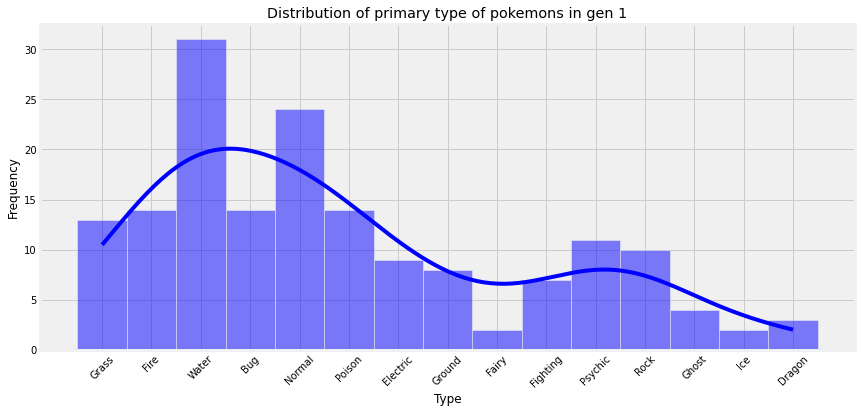

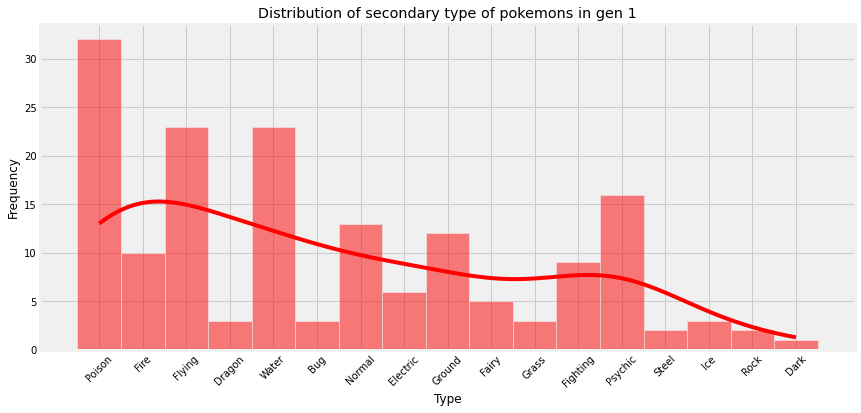

In [14]:
a=df[df['Generation']==1]
plt.figure(figsize=(13,6))
sns.histplot(a['Type 1'], bins=30, kde=True, color='blue')
plt.title('Distribution of primary type of pokemons in gen 1')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(13,6))
sns.histplot(a['Type 2'], bins=30, kde=True, color='red')
plt.title('Distribution of secondary type of pokemons in gen 1')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

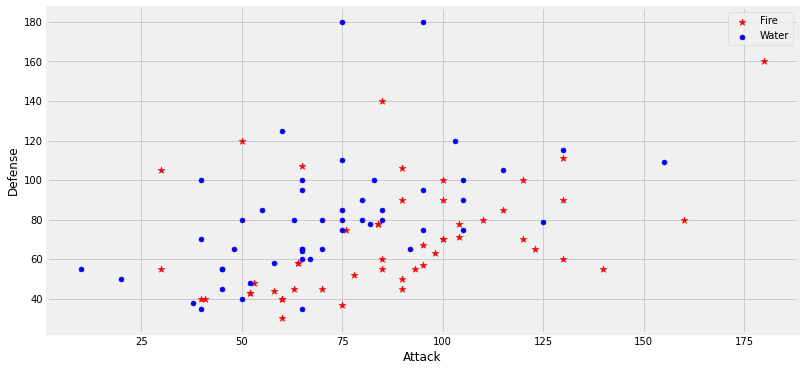

In [15]:
fire=df[(df['Type 1']=='Fire') | ((df['Type 2'])=="Fire")] 
water=df[(df['Type 1']=='Water') | ((df['Type 2'])=="Water")]
plt.scatter(fire["Attack"].head(50),fire["Defense"].head(50),color='Red',label='Fire',marker="*",s=50)
plt.scatter(water["Attack"].head(50),water["Defense"].head(50),color='Blue',label="Water",s=25)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.legend()
plt.plot()
fig=plt.gcf()  
fig.set_size_inches(12,6)
plt.show()

In [16]:
strong=df.sort_values(by='Total', ascending=False)
strong.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


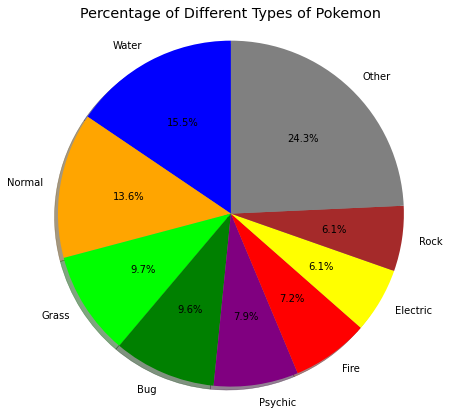

In [17]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['blue', 'orange', 'lime', 'green', 'purple', 'red', 'yellow', 'brown', 'grey']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

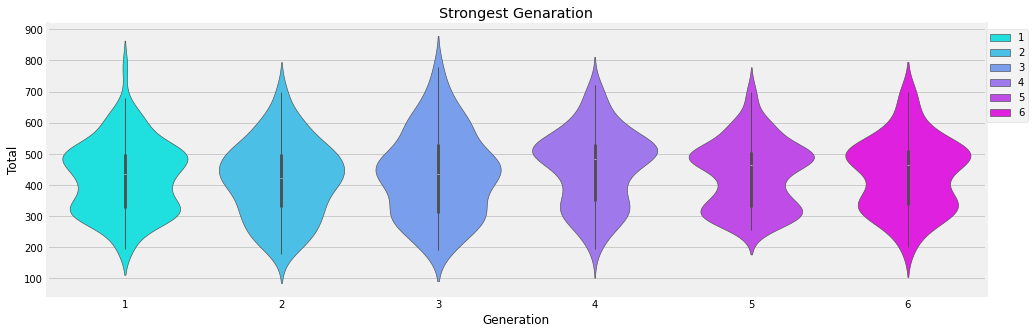

In [18]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "Generation", y = "Total",data = df,palette="cool",hue="Generation")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

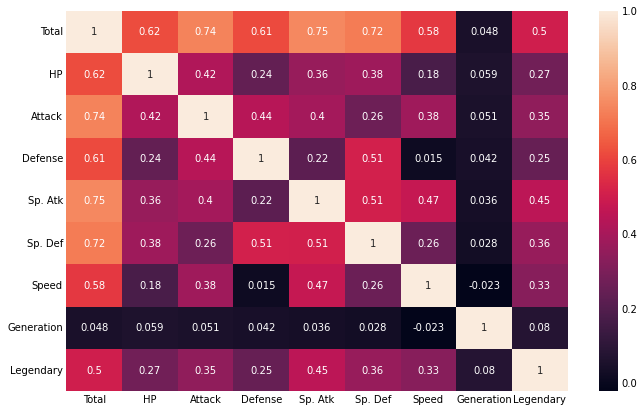

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()